# Homework assignment: Correlation and regression

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from statsmodels.api import qqplot
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from statsmodels.graphics.factorplots import interaction_plot

plt.style.use('seaborn')

Before doing any correlation and regression analysis, we ought to do some exploratory analysis on our dataset such as cleaning the data, handling the outliers and transforming the data set.

In [2]:
#load the shopping data
shopping_raw = pd.read_csv('04_Assignment_data_extended.csv', sep=';')

In [3]:
#first five records
shopping_raw.head(5)

,ID,Year_of_Birth,Highest_Qualification,Marital_Status,Income,Kids_home,Teen_home,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complains,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,0,0,0,0,0,0,8,10,4,1617
1,2174,1954,Graduation,Single,46344.0,1,1,0,0,0,0,0,0,1,1,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,0,0,0,0,0,0,8,2,10,776
3,6182,1984,Graduation,Together,26646.0,1,0,0,0,0,0,0,0,2,0,4,53
4,5324,1981,PhD,Married,58293.0,1,0,0,0,0,0,0,0,5,3,6,422


In [4]:
#check the columns
col = shopping_raw.columns.to_list()
col

['ID',
 'Year_of_Birth',
 'Highest_Qualification',
 'Marital_Status',
 'Income',
 'Kids_home',
 'Teen_home',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complains',
 'No._WebPurchases',
 'No._CatalogPurchases',
 'No._StorePurchases',
 'Revenue']

We notice that the columns related to the acceptance of offers after campaigns are not well ordered and a bit messy, so let's rearrange the order of the columns - 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2' to the ascending order to make the data more readable.

In [5]:
shopping1 = shopping_raw.reindex(columns=col[:7]+sorted(col[7:12])+col[12:])
shopping1.head(5)

,ID,Year_of_Birth,Highest_Qualification,Marital_Status,Income,Kids_home,Teen_home,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complains,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,0,0,0,0,0,0,8,10,4,1617
1,2174,1954,Graduation,Single,46344.0,1,1,0,0,0,0,0,0,1,1,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,0,0,0,0,0,0,8,2,10,776
3,6182,1984,Graduation,Together,26646.0,1,0,0,0,0,0,0,0,2,0,4,53
4,5324,1981,PhD,Married,58293.0,1,0,0,0,0,0,0,0,5,3,6,422


In [6]:
print(shopping1.shape)

(2240, 17)


The dataset has 2240 rows and 17 columns. Then check the table schema, its columns, rows, data types, and missing values.

In [7]:
shopping1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   Year_of_Birth          2240 non-null   int64  
 2   Highest_Qualification  2240 non-null   object 
 3   Marital_Status         2240 non-null   object 
 4   Income                 2216 non-null   float64
 5   Kids_home              2240 non-null   int64  
 6   Teen_home              2240 non-null   int64  
 7   AcceptedCmp1           2240 non-null   int64  
 8   AcceptedCmp2           2240 non-null   int64  
 9   AcceptedCmp3           2240 non-null   int64  
 10  AcceptedCmp4           2240 non-null   int64  
 11  AcceptedCmp5           2240 non-null   int64  
 12  Complains              2240 non-null   int64  
 13  No._WebPurchases       2240 non-null   int64  
 14  No._CatalogPurchases   2240 non-null   int64  
 15  No._

In the preceding output, we can see that there are 17 columns in the data. Out of these, 1 column (Income) has missing values, 2 columns (Highest_Qualification and Marital_Status) are Strings, 1 is float, and 14 are of datatype integer. Then, take a look at the descriptive statistics of the data by using the describe function.

In [8]:
shopping1.describe()

,ID,Year_of_Birth,Income,Kids_home,Teen_home,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complains,No._WebPurchases,No._CatalogPurchases,No._StorePurchases,Revenue
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,4.084821,2.662054,5.790179,605.798214
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,2.778714,2.923101,3.250958,602.249288
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,68.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,5.000000,396.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,8.000000,1045.500000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,28.000000,13.000000,2525.000000


From these results, we can see the central tendency as well as the range of the numerical data. We can already tell that the column `Year_of_Birth` needs further analysis because there seems to be outliers, for an active customer is highly unlikely to be born in 1893. Let's also have a look at the descriptive statistics of the columns of "object" datatype:

In [9]:
shopping1.describe(include='O')

,Highest_Qualification,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


We can see that most of the customers are with graduation and are married. Then check unique values of the `Highest_Qualification`, `Marital_Status`, `Kids_home`, `Teen_home`, `AcceptedCmp1-5` and `Complains` column to see if there are any unreasonable and noisy data.

In [10]:
print('Unique values of column "Highest_Qualification": {}'.format(shopping1.Highest_Qualification.unique()))
print('Unique values of column "Marital_Status": {}'.format(shopping1.Marital_Status.unique()))
print('Unique values of column "Kids_home": {}'.format(shopping1.Kids_home.unique()))
print('Unique values of column "Teen_home": {}'.format(shopping1.Teen_home.unique()))
print('Unique values of column "AcceptedCmp1": {}'.format(shopping1.AcceptedCmp1.unique()))
print('Unique values of column "AcceptedCmp2": {}'.format(shopping1.AcceptedCmp2.unique()))
print('Unique values of column "AcceptedCmp3": {}'.format(shopping1.AcceptedCmp3.unique()))
print('Unique values of column "AcceptedCmp4": {}'.format(shopping1.AcceptedCmp4.unique()))
print('Unique values of column "AcceptedCmp5": {}'.format(shopping1.AcceptedCmp5.unique()))
print('Unique values of column "Complains": {}'.format(shopping1.Complains.unique()))

Unique values of column "Highest_Qualification": ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values of column "Marital_Status": ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Unique values of column "Kids_home": [0 1 2]
Unique values of column "Teen_home": [0 1 2]
Unique values of column "AcceptedCmp1": [0 1]
Unique values of column "AcceptedCmp2": [0 1]
Unique values of column "AcceptedCmp3": [0 1]
Unique values of column "AcceptedCmp4": [0 1]
Unique values of column "AcceptedCmp5": [0 1]
Unique values of column "Complains": [0 1]


The values of these columns are all resonable and do not need further cleaning.

Next, let's handel the missing data and the outliers.

In [11]:
shopping1.isna().any()

ID                       False
Year_of_Birth            False
Highest_Qualification    False
Marital_Status           False
Income                    True
Kids_home                False
Teen_home                False
AcceptedCmp1             False
AcceptedCmp2             False
AcceptedCmp3             False
AcceptedCmp4             False
AcceptedCmp5             False
Complains                False
No._WebPurchases         False
No._CatalogPurchases     False
No._StorePurchases       False
Revenue                  False
dtype: bool

Consistent with our perious overview, `Income` column has missing values. We will calculate the average income of customers of groups with different highest qualifications, and then replace the `Income` null values with the mean `Income` value of that particular customer group (the same approach as we did in Assignment 3).

In [12]:
income_groups = shopping1.groupby('Highest_Qualification').Income.mean()
income_groups

Highest_Qualification
2n Cycle      47633.190000
Basic         20306.259259
Graduation    52720.373656
Master        52917.534247
PhD           56145.313929
Name: Income, dtype: float64

In [13]:
shopping1.loc[shopping1.Income.isna()]['Highest_Qualification'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master'], dtype=object)

In [14]:
def impute_income(cols):
    '''
    returns the average income of different educational qualifications groups
    '''
    highest_qualification = cols[0]
    income = cols[1]
    
    if pd.isna(income):
        
        if highest_qualification == 'Graduation':
            return income_groups['Graduation']
        elif highest_qualification == 'PhD':
            return income_groups['PhD']
        elif highest_qualification == '2n Cycle':
            return income_groups['2n Cycle']
        elif highest_qualification == 'Master':
            return income_groups['Master']
        
    else:
        return income

In [15]:
shopping1['Income'] = shopping1[['Highest_Qualification', 'Income']].apply(impute_income, axis=1)

In [16]:
#check na agian
shopping1.isna().any().sum()

0

Let's use boxplots to detect the potential outliers as individual points.

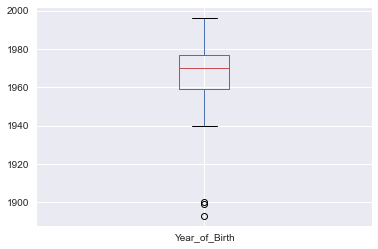

In [17]:
plt.figure(figsize=(6,4))
shopping1.boxplot('Year_of_Birth')
plt.show()

Outliers are displayed. An active customer with the year of birth beyond 1900 is highly unlikely and we treat these data as noises and thus drop these observations.

In [18]:
shopping1.drop(index=shopping_raw[shopping_raw.Year_of_Birth <= 1900].index, inplace=True)

In [19]:
#unreasonable age cleaned
shopping1.loc[shopping_raw.Year_of_Birth <= 1900, 'Year_of_Birth'].count()

0

For the other numerical columns (except `Kids_home`, `Teen_home`, `AcceptedCmp1-5`, `Complains`), we log-scale the y-axis to make the boxplot more readable.

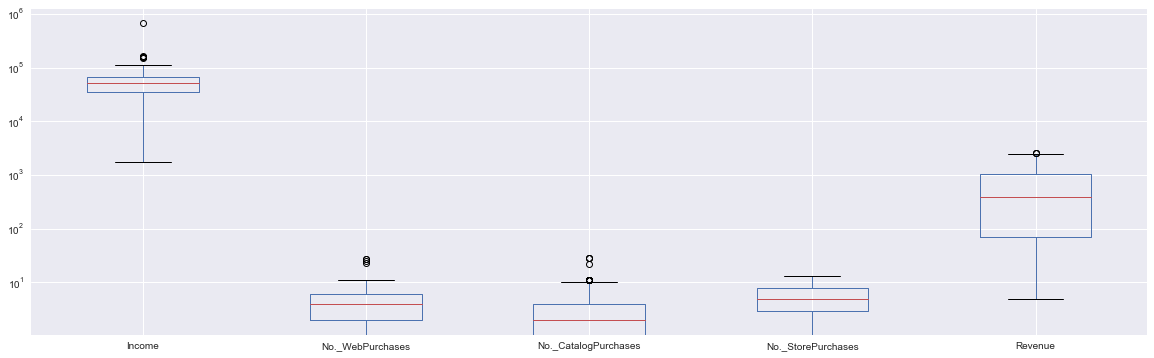

In [20]:
plt.figure(figsize=(20,6))
shopping_raw.boxplot(['Income', 'No._WebPurchases', 'No._CatalogPurchases', 'No._StorePurchases', 'Revenue'])
plt.yscale('log')
plt.show()

As the boxplots suggest, there are outliers in the dataset (dots beyond the Whiskers), for example in column `Income`, `No._WebPurchases`, `No._CatalogPurchases` and `Revenue`. However, these outliers are valid data points derived from a heavy-tailed distribution or rare events, so we will use the "winsorizing" technique to handle them by replacing all the outliers with the inter quartile range multiplied by 1.5, i.e. 1.5 x (q75% - q25%) (Inter-quartile-range rule). In this way, we can keep all observations remain in the dataset that may contain useful information.

We will create a winsorizing() function and perform the manipulation on the above mentioned columns:

In [21]:
def winsorizing(df, column):
    '''
    use the "winsorizing" technique to replace outliers of a column 
    with the inter quartile range multiplied by 1.5
    '''
    q25, q75 = np.quantile(df[column], [0.25, 0.75])
    iqr = q75 - q25
    lower_limit, upper_limit = q25 - 1.5*iqr, q75 + 1.5*iqr
    df.loc[df[column]<lower_limit, column] = lower_limit
    df.loc[df[column]>upper_limit, column] = upper_limit
    print(f'The "{column}" column is winsorized.')

In [22]:
#the columns to be manipulated
col_towinsorize = ['Income', 'No._WebPurchases', 'No._CatalogPurchases', 'No._StorePurchases', 'Revenue']

In [23]:
#create a new data set by making a copy of "shopping_raw" and perform winsorizing on it, so that shopping_raw stays untouched
shopping = shopping1.copy()

for column in col_towinsorize:
    winsorizing(shopping, column)

The "Income" column is winsorized.
The "No._WebPurchases" column is winsorized.
The "No._CatalogPurchases" column is winsorized.
The "No._StorePurchases" column is winsorized.
The "Revenue" column is winsorized.


Let's view the winsorized dataset:

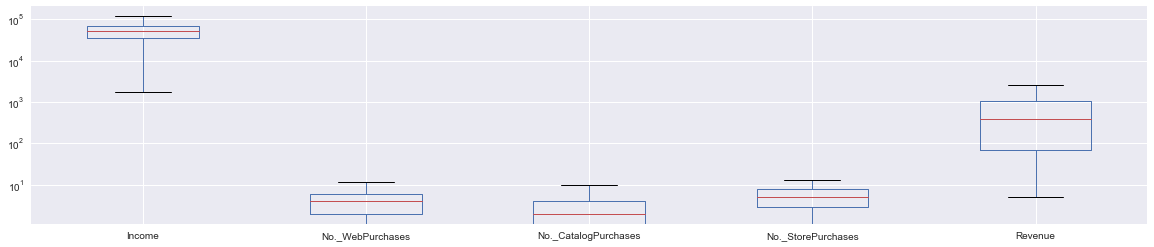

In [24]:
plt.figure(figsize=(20,4))
shopping.boxplot(col_towinsorize)
plt.yscale('log')
plt.show()

As the boxplot of the new dataset suggests, there are no more outliers. After data cleaning, we now transform the data. As implemented in "Assignment 03", it is a good approach to devide the data in Martial_Status in two groups:
- 'Married’, 'Together' should be labeled 'Relationship'
- 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' should be labeled 'Single'

In [25]:
#Create mappings and replace
mappings = {
            'Married':'Relationship', 
            'Together':'Relationship',
            'Divorced':'Single', 
            'Widow':'Single', 
            'Alone':'Single', 
            'YOLO':'Single', 
            'Absurd':'Single'
}
shopping.Marital_Status = shopping.Marital_Status.replace(mappings)

In [26]:
#check the unique values in "Martial_Status"
print(shopping.Marital_Status.unique())

['Single' 'Relationship']


Finally, we slightly modify the name of the columns `No._WebPurchases`, `No._CatalogPurchases`, `No._StorePurchases`to align the format with our naming convention and also to ensure that the regression model in the next question will work: 

In [27]:
shopping.rename(columns={'No._WebPurchases':'Num_WebPurchases', 'No._CatalogPurchases':'Num_CatalogPurchases', \
                         'No._StorePurchases':'Num_StorePurchases'}, inplace=True)

An overview of the cleaned and transformed data:

In [28]:
shopping.head()

,ID,Year_of_Birth,Highest_Qualification,Marital_Status,Income,Kids_home,Teen_home,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complains,Num_WebPurchases,Num_CatalogPurchases,Num_StorePurchases,Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,0,0,0,0,0,0,8,10,4.0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,0,0,0,0,0,0,1,1,2.0,27
2,4141,1965,Graduation,Relationship,71613.0,0,0,0,0,0,0,0,0,8,2,10.0,776
3,6182,1984,Graduation,Relationship,26646.0,1,0,0,0,0,0,0,0,2,0,4.0,53
4,5324,1981,PhD,Relationship,58293.0,1,0,0,0,0,0,0,0,5,3,6.0,422


Now, we can proceed with correlation and regression analysis.

## Question 1
Which five attributes does the revenue correlate with most strongly? Is this
correlation significant? Give the correlation coefficient and the p-value as a
number and interpret the result.

For correlation analysis, we just focus on columns of numerical i.e. ratio and interval data and ignore categorical variables. Thus, we will calculate Pearson's correlation.

In [29]:
#slice the data frame using numerical columns
num_cols = ['Year_of_Birth', 'Income', 'Kids_home', 'Teen_home', 'Num_WebPurchases', 'Num_CatalogPurchases', 'Num_StorePurchases', 'Revenue']
shopping_num = shopping[num_cols]

In [30]:
#the correlation matrix of all numerical columns
corr_mat = shopping_num.corr()
corr_mat

,Year_of_Birth,Income,Kids_home,Teen_home,Num_WebPurchases,Num_CatalogPurchases,Num_StorePurchases,Revenue
Year_of_Birth,1.000000,-0.204194,0.234133,-0.363350,-0.159704,-0.141261,-0.139465,-0.113940
Income,-0.204194,1.000000,-0.518295,0.036229,0.493620,0.716637,0.650890,0.803805
Kids_home,0.234133,-0.518295,1.000000,-0.035753,-0.377223,-0.531074,-0.500387,-0.556935
Teen_home,-0.363350,0.036229,-0.035753,1.000000,0.161140,-0.109766,0.050517,-0.137752
Num_WebPurchases,-0.159704,0.493620,-0.377223,0.161140,1.000000,0.448094,0.542906,0.548613
Num_CatalogPurchases,-0.141261,0.716637,-0.531074,-0.109766,0.448094,1.000000,0.572088,0.808189
Num_StorePurchases,-0.139465,0.650890,-0.500387,0.050517,0.542906,0.572088,1.000000,0.675603
Revenue,-0.113940,0.803805,-0.556935,-0.137752,0.548613,0.808189,0.675603,1.000000


Let's visualize the correlation matrix with the help of the heatmap:

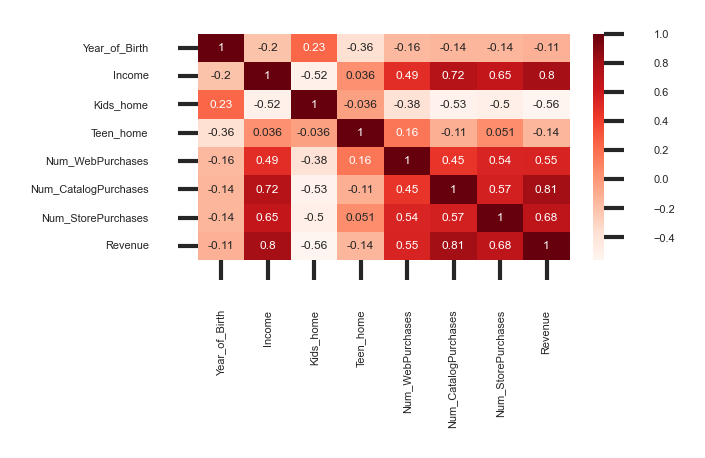

In [31]:
plt.figure(figsize=(2,1), dpi = 300)
sns.set_context('paper', font_scale=0.3)
sns.heatmap(corr_mat, annot=True, cmap='Reds')
plt.show()

#adjust the plot parameters after running heatmap
sns.set_context(font_scale=1)
parameters = {'axes.labelsize':15, 'axes.titlesize':15, 'xtick.labelsize':12, 'ytick.labelsize':12, \
              'legend.title_fontsize':10, 'legend.fontsize':10}
plt.rcParams.update(parameters)

Note that to answer this question, we need to be aware that the sign of the correlation coefficient (ie, positive or negative) defines the direction of the relationship, whereas the absolute value indicates the strength of correlation. Thus, we will select the 5 strongest correlations, except for the correlation between "revenue" and itself, which are perfectly correlated, based on the absolute value.

In [32]:
df_corr = corr_mat.loc[abs(corr_mat.Revenue).nlargest(6).index, ['Revenue']][1:].rename(columns={'Revenue':'Pearson r'})
df_corr

,Pearson r
Num_CatalogPurchases,0.808189
Income,0.803805
Num_StorePurchases,0.675603
Kids_home,-0.556935
Num_WebPurchases,0.548613


In [33]:
#we add a column of the interpretation of the correlation coefficient based on the scale given in the course script
df_corr['r interpretation'] = df_corr['Pearson r'].apply(lambda val: 
                           'Perfectly positive' if val==1.0
                           else ('Strongly positive' if 0.8<=val<1.0
                                 else ('Moderately positive' if 0.5<=val<0.8
                                       else ('Weakly positive' if 0.2<=val<0.5
                                             else ('No association' if -0.2<val<0.2
                                                  else ('Weakly negative' if -0.5<val<=-0.2
                                                       else('Moderately negative' if -0.8<val<=-0.5
                                                           else ('Strongly negative' if -1.0<val<=-0.8 else 'Perfectly negative'))))))))

In [34]:
df_corr

,Pearson r,r interpretation
Num_CatalogPurchases,0.808189,Strongly positive
Income,0.803805,Strongly positive
Num_StorePurchases,0.675603,Moderately positive
Kids_home,-0.556935,Moderately negative
Num_WebPurchases,0.548613,Moderately positive


It's worth noting that there is a negative correlation between the revenue and the number of kids of a customer, meaning revenue tend to increase with a decreasing number of kids; and tend to decrease with the a increasing number of kids. As next, let's expore the significance of the correlation by inspecting the p-value for testing non-correlation.

In [35]:
#create a list of p-values for testing non-correlation and attach it to our "df_corr" dataframe as a new column "p-value"
df_corr['p-value'] = [pearsonr(shopping_num[i], shopping_num.Revenue)[1] for i in df_corr.index]
df_corr

,Pearson r,r interpretation,p-value
Num_CatalogPurchases,0.808189,Strongly positive,0.000000e+00
Income,0.803805,Strongly positive,0.000000e+00
Num_StorePurchases,0.675603,Moderately positive,3.445879e-298
Kids_home,-0.556935,Moderately negative,1.866166e-182
Num_WebPurchases,0.548613,Moderately positive,5.093675e-176


p-value roughly indicates the probability of an uncorrelated system producing datasets with a Pearson correlation at least as extreme as the one computed from these datasets.
As all p-values are smaller than 0.05, the null hypothesis (correlation equal to 0) is thus rejected, meaning that there are significant linear relationships between each of these five attributes and “revenue”, in other words, the correlation cofficients are significantly different from zero.

On last step, let's visualize the relations between `Revenue` and the two most correlated features to it - `Num_CatalogPurchases` and `Income` using scatter-plot.

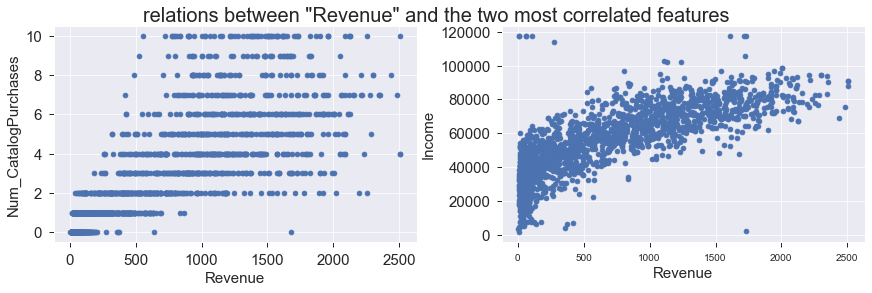

In [36]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(shopping_num['Revenue'], shopping_num['Num_CatalogPurchases'])
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_xlabel('Revenue', fontsize=15)
ax[0].set_ylabel('Num_CatalogPurchases', fontsize=15)

ax[1].scatter(shopping_num['Revenue'], shopping_num['Income'])
ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_xlabel('Revenue', fontsize=15)
ax[1].set_ylabel('Income', fontsize=15)

plt.xticks(fontsize=10)
fig.suptitle('relations between "Revenue" and the two most correlated features', fontsize=20)
plt.tight_layout()
plt.show()

## Question 2
Create and interpret a multiple regression model that explains the revenue. Explain and interpret the model. Describe what recommendations you can give the retailer, to increase the revenue.

In this step, we create a linear model that estimates revenues based on all attributes (independent variables):

In [37]:
#We add a zero to the formula to denote not including a global intercept term
lm_revenue_all = ols("Revenue ~ Year_of_Birth+Highest_Qualification+Marital_Status+Income+Kids_home+Teen_home+ \
                    AcceptedCmp1+AcceptedCmp2+AcceptedCmp3+AcceptedCmp4+AcceptedCmp5+Complains+ \
                    Num_WebPurchases+Num_CatalogPurchases+Num_StorePurchases + 0", data=shopping).fit()

In [38]:
#view the summary report
print(lm_revenue_all.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     567.4
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:13   Log-Likelihood:                -15562.
No. Observations:                2237   AIC:                         3.116e+04
Df Residuals:                    2218   BIC:                         3.127e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Highes

### Interpretation and assessment of model fit:

#### 1. Quantifying model fit:

1.1 Statistically significant independent variables

As the p-values of the independent variables in the summary report show, variables `Income`, `Kids_home`, `Teen_home`, `AcceptedCmp1`, `AcceptedCmp4`, `AcceptedCmp5`, `Num_WebPurchases`, `Num_CatalogPurchases` and `Num_StorePurchases` could statistically significantly explain the revenue. 

1.2 Coefficient of determination

The parameter R² indicates that this regression accounted for 82.2% of the explained variability in the revenue. Contrary to R², the adjusted R² (here 82%) also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model.
In general, a higher R² may be a sign of a better model fit, but the situation becomes more complicated in multiple regression, because additional explanatory variables will always increase R², even if the marginal contribution of the new variables is not statistically significant. Consequently, a relatively high R² may reflect the impact of a large set of independent variables rather than how well the set explains the dependent variable. This problem is often referred to as overestimating the regression. With too many predictors in the model, one can run into the issue of over‐fitting the data. The adjusted R² applies a penalty as the number of explanatory variables increases. Thus, model fits in multiple regression are often compared using the adjusted R².

1.3 Residual standard error

Residual standard error (RSE) is a measure of the typical size of the residuals. Roughly speaking, it is the average amount that the response will deviate from the true regression line and thus is a measure of the accuracy for regression model. Equivalently, it's a measure of how wrong we can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

In [39]:
# 1. Calculate Mean squared error of the residuals (The sum of squared residuals divided by the residual degrees of freedom.)
mse_orig = lm_revenue_all.mse_resid
# 2. Calculate RSE by taking the root of mse_orig
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

RSE of original model:  255.2119743310387


According to the RSE, the typical difference between observed revenue and predicted revenue is about 255.

1.4 Root Mean Square Error

Similarly, Root Mean Square Error (RMSE) is also a good estimator for the standard deviation σ of the distribution of our errors, it gives an idea of how much error the system typically makes in its predictions, with a higher weight for large errors.

In [40]:
#residuals
residuals = lm_revenue_all.resid
#Root Mean Square Error (RMSE)
np.sqrt(sum(residuals**2)/len(shopping.index))

254.1258393740536

#### 2. Visualizing model fit:

2.1 Q-Q plot of residuals

The Q-Q plot shows whether or not the residuals follow a normal distribution. If the points track along the straight line, they are normally distributed. If not, they aren't.

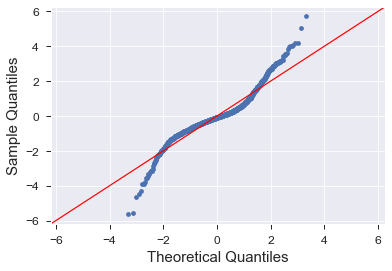

In [41]:
qqplot(data=lm_revenue_all.resid, fit=True, line="45")
plt.show()

We can see from the plot that the points are not following the line closely, which indicates a poor fit. Similarly, the following histogram also shows that the distribution of the residuals is not normal:

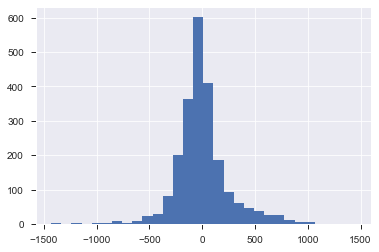

In [42]:
plt.figure(figsize=(6,4))
lm_revenue_all.resid.hist(bins=30)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

2.2 Scale-Location Plot

This plot displays the fitted values of the regression model along the x-axis and the square root of the standardized residuals along the y-axis.

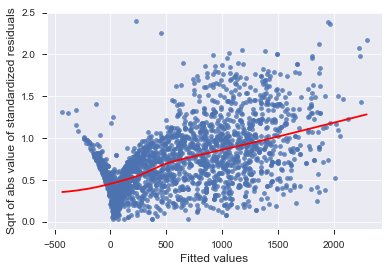

In [43]:
# Preprocessing steps
model_norm_residuals = lm_revenue_all.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
plt.figure(figsize=(6,4))
sns.regplot(x=lm_revenue_all.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True, line_kws={'color':'red'})
plt.xlabel("Fitted values", fontsize=12)
plt.ylabel("Sqrt of abs value of standardized residuals", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

The Scale-Location plot shows that the residuals are not spread equally along the ranges of input variables - different pattern for each level, the assumption of equal variance (homoscedasticity) is not satisfied. We could therefore conclude that there’s heteroscedasticity in the residuals.

As next, we will just focus on the significant independent variables (with p-value < 0.05) and further seperate the variables into two groups: those with positive coefficients (revenue drivers) and those with negative coefficients (revenue brakes). And recommend the retailer to increase the investment in revenue drivers while decrease the investment in revenue brakes variables.

In [44]:
#the explanatory variables with a p-value of smaller than 0.05 are considered significant
significant_var = lm_revenue_all.params[(lm_revenue_all.pvalues < 0.05)]
significant_var

Income                    0.008713
Kids_home               -71.430018
Teen_home              -121.078835
AcceptedCmp1             88.157150
AcceptedCmp4             81.580012
AcceptedCmp5            267.758782
Num_WebPurchases         29.640788
Num_CatalogPurchases     76.202142
Num_StorePurchases       27.545512
dtype: float64

In [45]:
#Independent variables with positive coefficients (revenue drivers)
significant_var[significant_var > 0].index.tolist()

['Income',
 'AcceptedCmp1',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Num_WebPurchases',
 'Num_CatalogPurchases',
 'Num_StorePurchases']

In [46]:
#Independent variables with negative coefficients (revenue brakes)
significant_var[significant_var <= 0].index.tolist()

['Kids_home', 'Teen_home']

Based on the analysis above, we recommend the retailer to increase the investment in marketing activities targeting the customers
- who have higher income
- who accepted the offer in the 1st, 4th and 5th campaign

and to increase the investment in
- improving company’s website's quality
- improving company’s catalog's quality
- improving the condition of company’s stores

in order to increase the number of purchases; 

while decrease the investment in marketing activities targeting the customers with kids or teenagers at home, and remove them from target group.

## Question 3
Now try to improve the regression model. From now on, we continue with the 9 significant independent variables as selected above and fit a new regression model on them.

In [47]:
formula_9 = "Revenue ~ Income+Kids_home+Teen_home+AcceptedCmp1+AcceptedCmp4+AcceptedCmp5+Num_WebPurchases+Num_CatalogPurchases+Num_StorePurchases"
lm_revenue_9 = ols(formula_9, data=shopping).fit()

In [48]:
lm_revenue_9.rsquared

0.8207397654079562

According to R², 82.07% of the variability in revenue is explained by our model.

### 1. Check the model for multicollinearity

In [49]:
y, X = dmatrices(formula_9, data = shopping, return_type ="dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,15.5,Intercept
1,2.9,Income
2,1.6,Kids_home
3,1.1,Teen_home
4,1.3,AcceptedCmp1
5,1.2,AcceptedCmp4
6,1.4,AcceptedCmp5
7,1.6,Num_WebPurchases
8,2.4,Num_CatalogPurchases
9,2.1,Num_StorePurchases


From the result we can see that the Variance Inflation Factor of all the independent variables are below 4 that means the independent variables are almost not correlated with any other independent variable, thus multicollinearity is not a problem of the model.

### 2. Examination of interaction effects

There are two points worth noting:

1) we do not consider higher‐order interactions here because they are diﬀicult to interpret;

2) theoretically, the 2-way interaction terms between all the independent variables could be added into the code by building a model as **ols("Revenue~(Income+AcceptedCmp1+AcceptedCmp4+AcceptedCmp5+Num_WebPurchases+Num_CatalogPurchases+Num_StorePurchases)\*\*2",data=shopping).fit()**, but in order to avoid making this report too long, we just focus on the interaction between `AcceptedCmp4` and `AcceptedCmp5` and take this as an illustrating example. (Please also note that the interaction between other categorical and continuous variables are also computed and evaluated but not listed here not only because the syntax of adding interaction terms is similar but also for the sake of the readability and conciseness of the report.)

In [50]:
lm_revenue_9_2_way_inter = ols("Revenue ~ Income+Kids_home+Teen_home+AcceptedCmp1+AcceptedCmp4+AcceptedCmp5+ \
Num_WebPurchases+Num_CatalogPurchases+Num_StorePurchases + AcceptedCmp4:AcceptedCmp5", data=shopping).fit()

In [51]:
print(lm_revenue_9_2_way_inter.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1024.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:19:14   Log-Likelihood:                -15564.
No. Observations:                2237   AIC:                         3.115e+04
Df Residuals:                    2226   BIC:                         3.121e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

We can see that by including this interaction term, the R² and adjusted R² have increased to 82.1%. As next, let's visualize the interaction, since the lines are not parallel, there is an interaction:

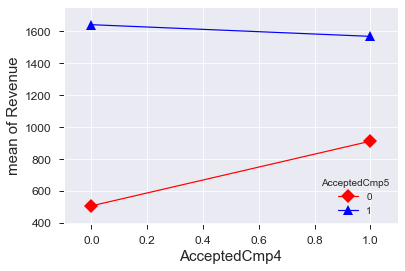

In [52]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x=shopping["AcceptedCmp4"],
    trace=shopping["AcceptedCmp5"],
    response=shopping["Revenue"],
    colors=["red", "blue"],
    markers=["D", "^"],
    ms=10,
    ax=ax,
)
plt.show()

To improve the model, another approach besides including interaction term in the model is to perform feature engineering:

### 3. Feature engineering
Here we'll apply Principal Component Analysis (“PCA”): The principal components are the directions along which the data varies. PCA is used to find combinations of the original predictors that capture the most information in the form of variation. These combinations reduce the original set of predictors, where each combination of predictor variables are uncorrelated.

To conduct PCA, we'll just focus on the numerical variables (i.e. the dataset "shopping_num" created before) and scale the data by applying standard scaling at first. After running PCA, we then visualize and analyse the explained variance, which is a statistical measure of how much variation in a dataset can be attributed to each of the principal components generated by a PCA.

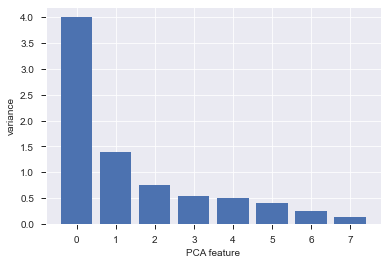

In [53]:
plt.figure(figsize=(6,4))
# Create scaler: scaler
scaler = StandardScaler()
# Create a PCA instance: pca
pca = PCA()
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)
# Fit the pipeline to 'shopping_num'
pipeline.fit(shopping_num)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature', fontsize=10)
plt.ylabel('variance', fontsize=10)
plt.xticks(features, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [54]:
pca.explained_variance_ratio_.cumsum()

array([0.50074474, 0.67601018, 0.76954518, 0.83763447, 0.89983291,
       0.94988611, 0.98200842, 1.        ])

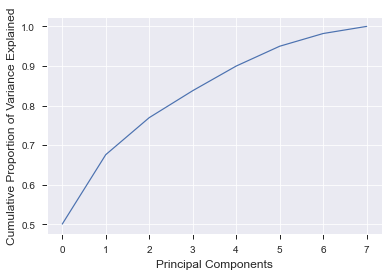

In [55]:
plt.figure(figsize=(6,4))
plt.plot(features, pca.explained_variance_ratio_.cumsum())
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Cumulative Proportion of Variance Explained', fontsize=12)
plt.xticks(features, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

We can see that the first principal component already contains over 50% of the variance. It is to conclude that 4 principal components are enough to describe at least 83% of the cumulative variance in this dataset.